# Лабораторная работа № 2. Логистическая регрессия

На основе набора данных об измерениях роста и веса решите следующую задачу.

Файл с данными - [Davis.csv](https://github.com/sdukshis/ml-intro/blob/master/datasets/Davis.csv)

Расширьте набор признаков добавив данные об измеренном и сообщенном весе, а также данные об поле человека.

Обратите внимание, что в некоторых строках встречаются пропуски. Это обычная ситуация при работе с реальными данными. Эти пропуски необходиму убрать из таблицы вместе со всей строкой. Это можно сделать с помощью метода [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [6]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [7]:
ds = pd.read_csv('Davis.csv', index_col=0)
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [8]:
from sklearn.linear_model import LogisticRegression

## Задание

1. Обучите модель логистической регресси на данных, используя в качестве целевой переменной пол (sex), а в качестве признаков рост и вес (height, weight).
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой
3. Расширьте простарнство признаков квадратичными признаками.
2. Нарисуйте точки выборки и разделяющую поверхость.
2. Оцените точность и полноту полученного решения и постройте график ROC кривой

In [9]:
#Load and filtering dataset
from sklearn.model_selection import train_test_split
dataset = ds[['weight', 'sex', 'height']].dropna()
x = pd.DataFrame(dataset[['weight','height' ]]) 
y= pd.DataFrame(dataset['sex'])
y['sex'] = y['sex'].map( {'F': 0, 'M': 1} ).astype(int)
x_train, x_valid, y_train, y_valid =  train_test_split(x, y, test_size = 0.25)

In [10]:
print(x_train)
print(y_train)

     weight  height
51       82     182
17       92     187
195      62     164
150      88     184
130      44     157
..      ...     ...
105      62     175
170      53     158
115      76     167
21      119     180
141      66     175

[150 rows x 2 columns]
     sex
51     1
17     1
195    0
150    1
130    0
..   ...
105    0
170    0
115    0
21     1
141    1

[150 rows x 1 columns]


<IPython.core.display.Javascript object>


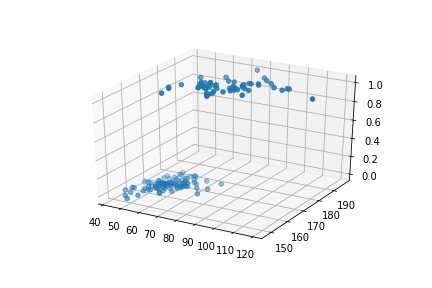

In [11]:
#Our data
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(x_train['weight'].values, x_train['height'].values, y_train.values)


In [13]:
#Lerning model
clf = LogisticRegression().fit(x_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#Get prediction
y_predict = clf.predict(x_valid)

In [15]:
#Get weights of model
dense = clf.densify().coef_[0] 
dense = np.append(dense, clf.intercept_)
print("B0 = ",dense[2],"; B1 = ", dense[0],"; B2 = ", dense[1]) 

B0 =  -70.23649371872634 ; B1 =  0.16330438737266967 ; B2 =  0.3457640996092796


In [16]:
#Find the points of the dividing plane
x = np.arange(min(x_valid['weight'].values), max(x_valid['weight'].values), 0.05)
y = np.arange(min(x_valid['height'].values), max(x_valid['height'].values), 0.05)
x_f = []
y_f = []
z_f = []
eps = 0.01
for x_ in x:
    for y_ in y:
       if((dense[0] * x_ + dense[1] * y_ + dense[2]) < eps) and ((dense[0] * x_ + dense[1] * y_ + dense[2]) > -eps) :
            x_f.append(x_)
            y_f.append(y_)
            z_f.append(0)
            x_f.append(x_)
            y_f.append(y_)
            z_f.append(1)
        

<IPython.core.display.Javascript object>


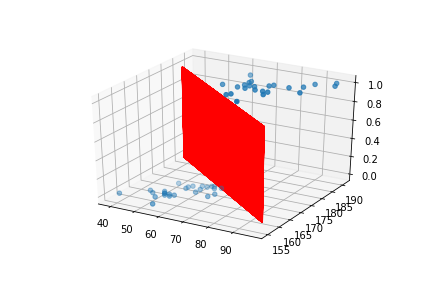

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_valid['weight'].values, x_valid['height'].values, y_predict)
ax.plot(x_f, y_f, z_f, color = 'red')

In [18]:
#Score
print("SCore: ",clf.score(x_valid, y_valid))

SCore:  0.86


<IPython.core.display.Javascript object>


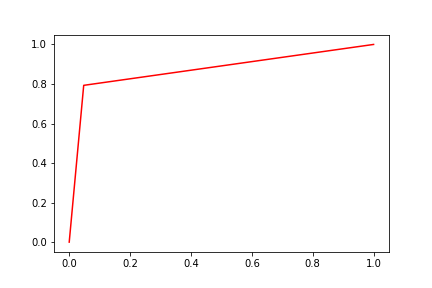

In [19]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

In [20]:
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_valid.values, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_valid.values, y_predict))

Recall:  0.7931034482758621
Precision:  0.9583333333333334


# Дополненная модель

In [26]:
#Load and filtering dataset
dataset = ds.dropna()
x = pd.DataFrame(dataset[['weight','height', 'repwt', 'repht' ]]) 
y= pd.DataFrame(dataset['sex'])
y['sex'] = y['sex'].map( {'F': 0, 'M': 1} ).astype(int)
x_train, x_valid, y_train, y_valid =  train_test_split(x, y, test_size = 0.25)

In [27]:
x_train

,weight,height,repwt,repht
156,54,169,58.0,165.0
120,65,178,66.0,178.0
144,54,176,55.0,176.0
147,55,165,55.0,165.0
36,64,176,65.0,175.0
...,...,...,...,...
42,80,178,80.0,178.0
169,96,191,95.0,188.0
164,59,172,58.0,171.0
68,64,164,62.0,161.0


In [28]:
#Lerning model
clf_for_more = LogisticRegression().fit(x_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print("Score: ", clf_for_more.score(x_valid, y_valid))

Score:  0.9130434782608695


In [30]:
#Get prediction 
y_predict = clf_for_more.predict(x_valid)
y_predict

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0])

In [38]:
#Get weights
dense = clf_for_more.densify().coef_
dense = np.append(dense, clf_for_more.intercept_)
print("B0 = ",dense[4], "; B1 = ",dense[0], ";\nB2 = ",dense[1], "; B3 = ",dense[2], "; B4 = ",dense[3])

B0 =  -65.38250578367678 ; B1 =  -0.23964831335583062 ;
B2 =  0.10808160878093652 ; B3 =  0.48152983330805005 ; B4 =  0.18133345243821208


<IPython.core.display.Javascript object>


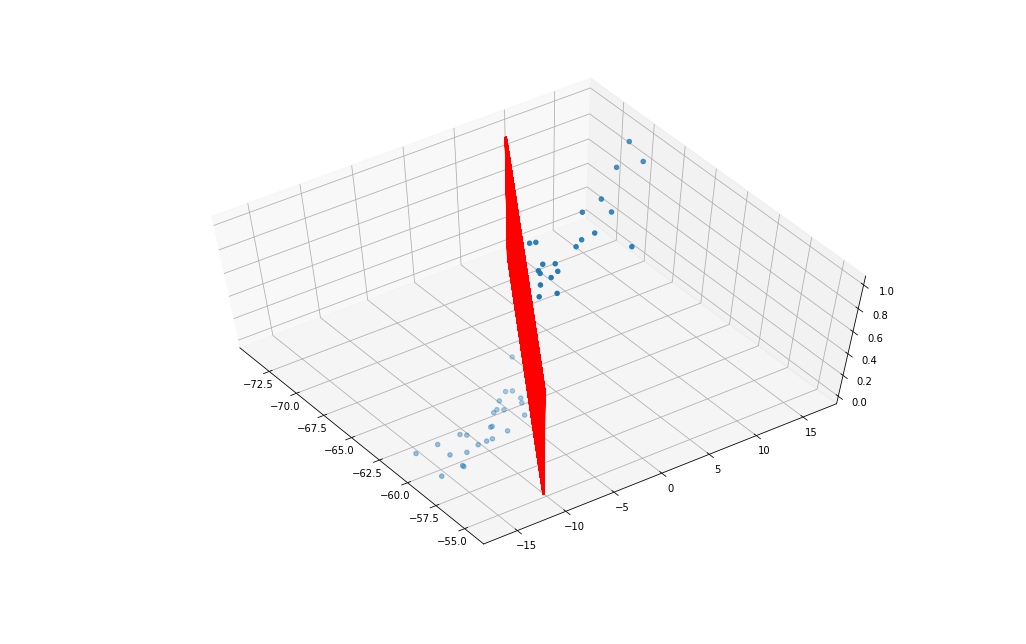

In [32]:
#Let's lower the dimension through linear dependence and find the points of the dividing plane
x1 = np.arange(min(x_valid['weight'].values), max(x_valid['weight'].values), 1)
x2 = np.arange(min(x_valid['height'].values), max(x_valid['height'].values), 1)
x3 = np.arange(min(x_valid['repwt'].values), max(x_valid['repwt'].values), 1)
x4 = np.arange(min(x_valid['repht'].values), max(x_valid['repht'].values), 1)

x_f = []
y_f = []
z_f = []
eps = 0.05
for x1_ in x1:
    for x2_ in x2:
        for x3_ in x3:
            for x4_ in x4:    
                a = dense[0] * x1_ + dense[1] * x2_ + dense[4]
                b =  dense[2] * x3_ + dense[3] * x4_ + dense[4]
                sol = a + b - dense[4]
                if(sol < eps) and (sol > -eps) :
                    x_f.append(a)
                    y_f.append(b)
                    z_f.append(0)
                    x_f.append(a)
                    y_f.append(b)
                    z_f.append(1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_valid['weight'].values * dense[0] + x_valid['height'].values * dense[1] + dense[4],
           x_valid['repwt'].values * dense[2] + x_valid['repht'].values * dense[3] + dense[4], y_predict)
ax.plot(x_f, y_f, z_f, color = 'red')

<IPython.core.display.Javascript object>


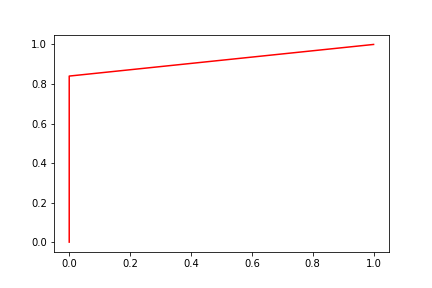

In [33]:
#ROC curve
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_valid, y_predict)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm, tpr_rt_lm, color = 'red')

In [34]:
#Get precision and recall
from sklearn.metrics import recall_score
print("Recall: ", recall_score(y_valid.values, y_predict))
from sklearn.metrics import precision_score
print("Precision: ", precision_score(y_valid.values, y_predict))

Recall:  0.84
Precision:  1.0
